Generation 1, Best fitness: 29
Generation 2, Best fitness: 29
Generation 3, Best fitness: 29
Generation 4, Best fitness: 28
Generation 5, Best fitness: 28
Generation 6, Best fitness: 28
Generation 7, Best fitness: 28
Generation 8, Best fitness: 28
Generation 9, Best fitness: 28
Generation 10, Best fitness: 28
Generation 11, Best fitness: 28
Generation 12, Best fitness: 28
Generation 13, Best fitness: 28
Generation 14, Best fitness: 28
Generation 15, Best fitness: 28
Generation 16, Best fitness: 28
Generation 17, Best fitness: 28
Generation 18, Best fitness: 28
Generation 19, Best fitness: 28
Generation 20, Best fitness: 28
Generation 21, Best fitness: 28
Generation 22, Best fitness: 28
Generation 23, Best fitness: 28
Generation 24, Best fitness: 28
Generation 25, Best fitness: 28
Generation 26, Best fitness: 28
Generation 27, Best fitness: 28
Generation 28, Best fitness: 28
Generation 29, Best fitness: 28
Generation 30, Best fitness: 28
Generation 31, Best fitness: 28
Generation 32, Be

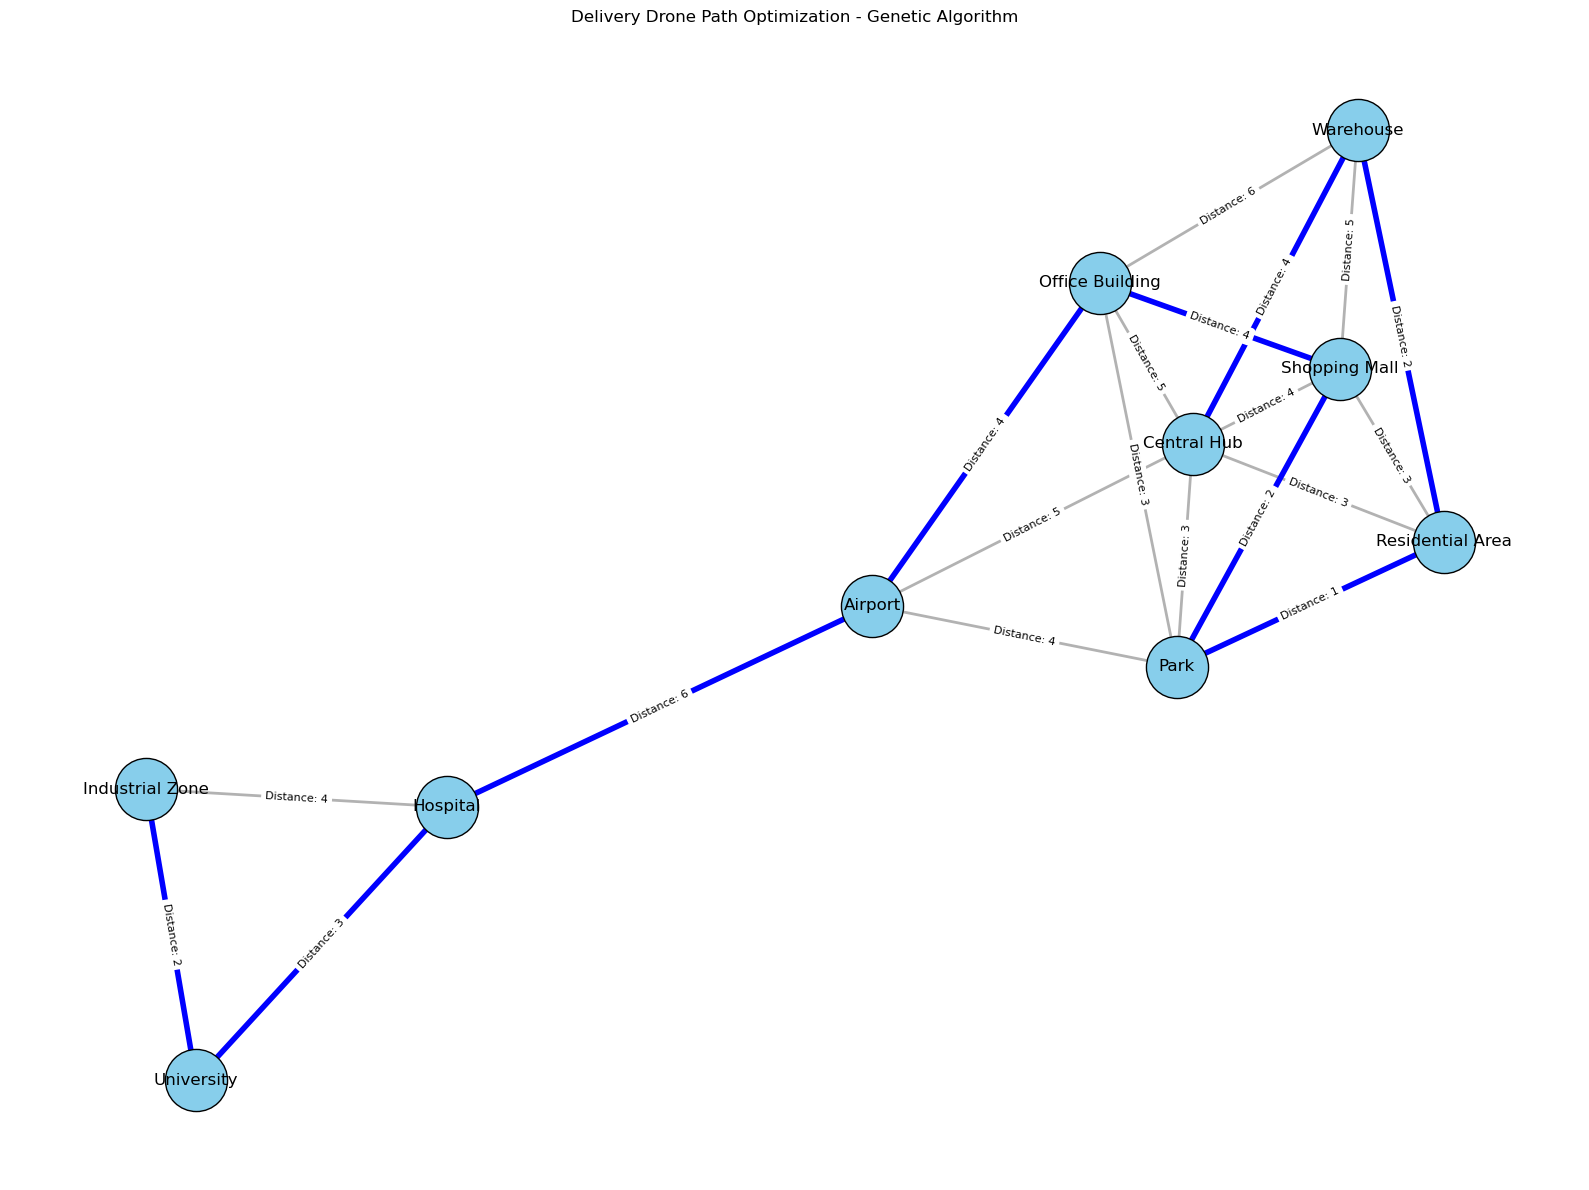

In [1]:

import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Define locations and their coordinates
locations = {
    "Central Hub": (0, 0),
    "Warehouse": (0, 4),
    "Residential Area": (2, 1),
    "Shopping Mall": (3, 3),
    "Park": (1, 3),
    "Office Building": (4, 4),
    "Airport": (5, 0),
    "Hospital": (2, 5),
    "University": (4, 1),
    "Industrial Zone": (5, 5)
}

# Define edges between locations and their distances, traffic, and urgency
edges = [
    ("Central Hub", "Warehouse", {"distance": 4, "traffic": 3, "urgency": 4}),
    ("Central Hub", "Residential Area", {"distance": 3, "traffic": 2, "urgency": 3}),
    ("Central Hub", "Shopping Mall", {"distance": 4, "traffic": 4, "urgency": 2}),
    ("Central Hub", "Park", {"distance": 3, "traffic": 1, "urgency": 5}),
    ("Central Hub", "Office Building", {"distance": 5, "traffic": 3, "urgency": 4}),
    ("Central Hub", "Airport", {"distance": 5, "traffic": 5, "urgency": 1}),
    ("Warehouse", "Residential Area", {"distance": 2, "traffic": 3, "urgency": 4}),
    ("Warehouse", "Shopping Mall", {"distance": 5, "traffic": 2, "urgency": 3}),
    ("Warehouse", "Office Building", {"distance": 6, "traffic": 4, "urgency": 2}),
    ("Residential Area", "Shopping Mall", {"distance": 3, "traffic": 1, "urgency": 5}),
    ("Residential Area", "Park", {"distance": 1, "traffic": 3, "urgency": 3}),
    ("Shopping Mall", "Park", {"distance": 2, "traffic": 4, "urgency": 2}),
    ("Shopping Mall", "Office Building", {"distance": 4, "traffic": 5, "urgency": 1}),
    ("Park", "Office Building", {"distance": 3, "traffic": 2, "urgency": 4}),
    ("Park", "Airport", {"distance": 4, "traffic": 3, "urgency": 3}),
    ("Office Building", "Airport", {"distance": 4, "traffic": 1, "urgency": 5}),
    ("Airport", "Hospital", {"distance": 6, "traffic": 2, "urgency": 4}),
    ("Hospital", "University", {"distance": 3, "traffic": 4, "urgency": 2}),
    ("University", "Industrial Zone", {"distance": 2, "traffic": 3, "urgency": 5}),
    ("Industrial Zone", "Hospital", {"distance": 4, "traffic": 2, "urgency": 3})
]

# Add nodes with coordinates to the graph
for location, coordinates in locations.items():
    G.add_node(location, pos=coordinates)

# Add edges with attributes to the graph
for source, target, edge_attrs in edges:
    G.add_edge(source, target, **edge_attrs)

# Genetic Algorithm Components

# Representation of Solutions (Chromosomes)
def create_chromosome(nodes):
    """Creates a chromosome representing a valid path through all nodes"""
    chromosome = nodes[:]
    while True:
        random.shuffle(chromosome)
        if all(G.has_edge(chromosome[i], chromosome[i + 1]) for i in range(len(chromosome) - 1)):
            break
    return chromosome

# Crossover Operation
def crossover(parent1, parent2):
    """Performs crossover between two parents to produce two children"""
    idx = random.randint(0, len(parent1) - 1)
    child1 = parent1[:idx] + [node for node in parent2 if node not in parent1[:idx]]
    child2 = parent2[:idx] + [node for node in parent1 if node not in parent2[:idx]]
    return child1, child2

# Mutation Operation
def mutate(chromosome):
    """Performs mutation by swapping two nodes"""
    idx1, idx2 = random.sample(range(len(chromosome)), 2)
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome

# Fitness Function
def calculate_fitness(chromosome, graph):
    """Calculates the fitness of a chromosome based on total distance"""
    total_distance = 0
    for i in range(len(chromosome) - 1):
        node1, node2 = chromosome[i], chromosome[i + 1]
        if graph.has_edge(node1, node2):
            total_distance += graph[node1][node2]['distance']
        else:
            return float('inf')  # Penalize for non-existing edges
    return total_distance

# Genetic Algorithm
def genetic_algorithm(graph, population_size=100, generations=50, mutation_rate=0.1):
    nodes = list(graph.nodes)
    population = [create_chromosome(nodes) for _ in range(population_size)]

    for generation in range(generations):
        population = sorted(population, key=lambda x: calculate_fitness(x, graph))
        best_fitness = calculate_fitness(population[0], graph)
        print(f'Generation {generation + 1}, Best fitness: {best_fitness}')

        next_population = population[:int(0.1 * population_size)]  # Elitism: top 10%

        while len(next_population) < population_size:
            parent1, parent2 = random.sample(population[:50], 2)  # Select from top 50
            child1, child2 = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child1 = mutate(child1)
            if random.random() < mutation_rate:
                child2 = mutate(child2)
            next_population.extend([child1, child2])

        population = next_population

    best_solution = sorted(population, key=lambda x: calculate_fitness(x, graph))[0]
    return best_solution

# Run the genetic algorithm
best_path = genetic_algorithm(G)
print(f'Optimal path: {best_path}')

# Draw the graph and highlight the best path
plt.figure(figsize=(16, 12))  # Set a larger figure size
pos = nx.spring_layout(G, k=0.5)  # Adjust the spring_layout parameter for better spacing

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Highlight the best path
path_edges = list(zip(best_path, best_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='blue')

# Optionally, reduce edge labels for clarity
edge_labels = {(u, v): f'Distance: {data["distance"]}' for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Set plot title and display
plt.title("Delivery Drone Path Optimization - Genetic Algorithm")
plt.axis('off')
plt.tight_layout()
plt.show()
